In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install opencv -python


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [2]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [7]:
dp='/content/drive/MyDrive/traini'


In [23]:
img = []
labls = []

for category in os.listdir(dp):
    category_path = os.path.join(dp, category)

    if not os.path.isdir(category_path):
        continue

    for file_name in os.listdir(category_path):
        image_path = os.path.join(category_path, file_name)

        if not os.path.isfile(image_path):
            continue

        im = cv2.imread(image_path)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im, (64, 64))

        features, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        img.append(features)
        labls.append(category)

In [52]:
X = np.array(img)
y = np.array(labls)

X = X/255

xflatten = X.reshape(X.shape[0], -1)

xtrain, xtest, ytrain, ytest = train_test_split(xflatten, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}


In [53]:
svm=SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
best_params = grid_search.best_params_
best_params

{'C': 10, 'kernel': 'rbf'}

In [54]:
ypred = grid_search.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7452229299363057


In [55]:
print(classification_report(ytest, ypred, target_names=['cat','dog']))

              precision    recall  f1-score   support

         cat       0.78      0.75      0.76       341
         dog       0.71      0.74      0.73       287

    accuracy                           0.75       628
   macro avg       0.74      0.74      0.74       628
weighted avg       0.75      0.75      0.75       628



In [29]:
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from skimage.io import imread


In [56]:
def preprocesser(image_path):

    image = cv2.imread(image_path)
    grayImg= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resizedImg = cv2.resize(grayImg, (64, 64))

    hog_features, hog_image = hog(resizedImg, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    feature_flat=hog_features.flatten()

    return feature_flat


enter image path/content/drive/MyDrive/test/cats/cat.4335.jpg


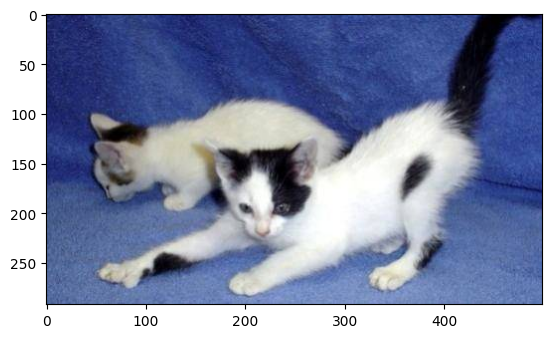

In [57]:
imgPath=input("enter image path")
pre=preprocesser(imgPath)
i=imread(imgPath)
plt.imshow(i)
plt.show()

In [50]:
reshapeImg=pre.reshape(1,-1)
prediction=grid_search.predict(reshapeImg)
print('prediction:',prediction)

prediction: ['cats']
